In [1]:
#Crawling
import time
import os  
from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv

#EDA- part1
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#EDA- part2
import matplotlib.image as mpimg
from IPython.display import IFrame

In [4]:
df=pd.read_csv('coffeeClean.csv')
df

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste
0,Roadmap CoffeeWorks,Ethiopia Kayon Mountain,"Odo Shakiso District, Guji Zone, southern Ethi...","Lexington, Virginia",Light,64/82,20.95,94,February 2023,9.0,9.0,9.0,9.0,8.0
1,Roadmap CoffeeWorks,El Salvador El Mirador,"Apaneca-Ilamatepec growing region, El Salvador","Lexington, Virginia",Medium-Light,60/77,20.95,93,February 2023,9.0,8.0,9.0,9.0,8.0
2,Vermont Artisan Coffee & Tea,Panama Finca Las Nubes Geisha Microlot,"Boquete growing region, Panama","Waterbury Center, Vermont",Medium-Light,60/77,15.00,94,February 2023,9.0,9.0,9.0,9.0,8.0
3,Durango Coffee Company,Kenya Karinga AA,"Kiambu County, Kenya","Durango, Colorado",Medium-Light,57/74,19.95,93,February 2023,9.0,9.0,8.0,9.0,8.0
4,Nomadic Bean,Ethiopia Guji Odo Shakiso,"Guji Zone, Oromia Region, Southern Ethiopia","Jackson Hole, Wyoming",Light,62/82,20.00,93,February 2023,9.0,8.0,9.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Moonstruck Farm,100% Kona Estate Grade,"Kona growing district, ""Big Island"" of Hawaii.","Captain Cook, Hawaii",Medium-Light,51/84,25.00,91,March 2010,8.0,8.0,8.0,9.0,8.0
4921,Paradise Roasters,Hawaii Laka,"Ka'u growing district, southwestern corner of ...","Ramsey, Minnesota",Light,66/99,25.00,92,March 2010,9.0,8.0,8.0,9.0,8.0
4922,Rusty's Hawaiian Coffee,100% Ka’u Classic,"Ka'u growing district, southwestern corner of ...","Pahala, Hawaii",Light,52/90,30.00,92,March 2010,9.0,8.0,8.0,9.0,8.0
4923,Coffea Roasterie,Dominican Republic Las Lagunas,Dominican Republic,"Sioux Falls, South Dakota",Medium-Light,54/71,14.25,92,March 2010,9.0,8.0,8.0,9.0,8.0


In [6]:
# Top ratings are: 93, 92, 94, 95, 90
df["Rating"].value_counts()

93    1251
92     933
94     907
91     470
95     436
90     381
89     128
96     118
88      99
87      62
97      26
86      25
85      24
84      14
83       8
79       6
80       5
77       4
98       3
73       3
67       3
75       3
78       2
82       2
63       2
68       2
72       2
71       1
74       1
76       1
52       1
66       1
69       1
Name: Rating, dtype: int64

<AxesSubplot:>

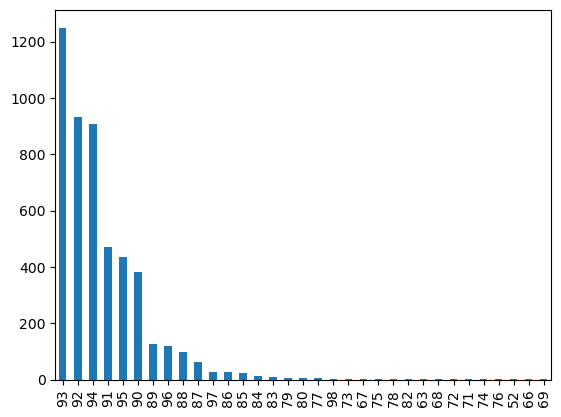

In [7]:
# Presented in bar & pie graph
df["Rating"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Rating'>

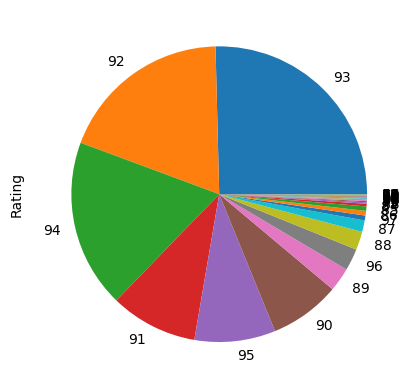

In [9]:
df["Rating"].value_counts().plot(kind='pie')

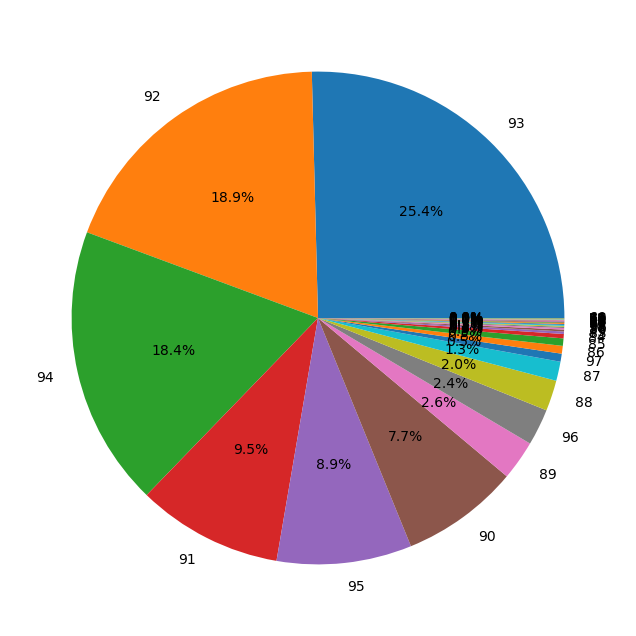

In [11]:
data_dict = df['Rating'].value_counts().to_dict()
data_dict

# create a pie chart from the updated dictionary
plt.figure(figsize=(8, 8))
plt.pie(data_dict.values(), labels=data_dict.keys(),autopct='%1.1f%%')

# show the pie chart
plt.show()

In [13]:
# Distribution of reviews by coffee harvest Origin country
df['Origin country'].value_counts()

Not disclosed.                                    171
Yirgacheffe growing region, southern Ethiopia     163
Yirgacheffe growing region, southern Ethiopia.    110
Nyeri growing region, south-central Kenya         102
Boquete growing region, western Panama             93
                                                 ... 
Kona; Panama; Mexico                                1
Dolores, Tolima Department, Colombia                1
Nensebo Woreda, Sidama, Ethiopia                    1
Thailand; Laos                                      1
Ranguitte, Haiti                                    1
Name: Origin country, Length: 1813, dtype: int64

<AxesSubplot:ylabel='Review Date'>

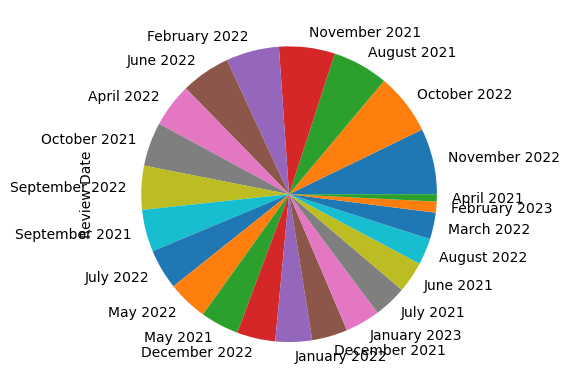

In [14]:
# Distribution of reviews by dates 
# Most of the reviews are from Oct-Nov.22 
df["Review Date"].head(1000).value_counts().plot(kind='pie')

In [15]:
# Distribution of reviews by price
df[['Rating', 'Price']].value_counts()

Rating  Price 
93      18.00     77
        20.00     46
92      18.00     45
93      16.00     44
92      16.00     41
                  ..
        7.99       1
        6.00       1
        4.00       1
        3.00       1
98      100.00     1
Length: 1596, dtype: int64

In [17]:
#Converting Rating to bool, adding a new column "Rating Bool" 1- rating > 90 else -0.

dfeda1 = df.copy()
dfeda1['Rating Bool'] = (dfeda1['Rating'] > 90).astype(int)
dfeda1.tail(1000)

,Coffee Name,Company Name,Origin country,Roaster Location:,Roast Level,Agtron,Price,Rating,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste,Rating Bool
3925,Homlamoon Coffee,Premium Roasted Thai Coffee Beans,Northern Thailand.,"Bangkok, Thailand",Dark,34/41,200.00,88,March 2013,8.0,7.0,8.0,8.0,7.0,0
3926,CafeTaster,Bolivia Organic Buenavista 1738,"Caranavi Province, La Paz Department, Bolivia.","I-Lan City, Taiwan",Medium,50/62,400.00,90,March 2013,9.0,8.0,8.0,8.0,7.0,0
3927,Marcheur Roaster,Bolivia Caarnavi Buenavista Organic Light Roast,"Caranavi Province, La Paz Department, Bolivia.","Taipei City, Taiwan",Medium-Light,55/78,14.00,90,March 2013,8.0,8.0,8.0,8.0,8.0,0
3928,Sunergos Coffee,Peru Cenfrocafe Microlot,"Cajamarca growing region, Peru.","Louisville, Kentucky",Medium,53/64,15.25,90,March 2013,8.0,8.0,8.0,8.0,8.0,0
3929,The WestBean Coffee Roasters,Bolivia Organic Uchumachi,"Carnavi Province, La Paz Department, Bolivia.","San Diego, California",Medium,52/64,16.99,91,March 2013,8.0,8.0,8.0,9.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Moonstruck Farm,100% Kona Estate Grade,"Kona growing district, ""Big Island"" of Hawaii.","Captain Cook, Hawaii",Medium-Light,51/84,25.00,91,March 2010,8.0,8.0,8.0,9.0,8.0,1
4921,Paradise Roasters,Hawaii Laka,"Ka'u growing district, southwestern corner of ...","Ramsey, Minnesota",Light,66/99,25.00,92,March 2010,9.0,8.0,8.0,9.0,8.0,1
4922,Rusty's Hawaiian Coffee,100% Ka’u Classic,"Ka'u growing district, southwestern corner of ...","Pahala, Hawaii",Light,52/90,30.00,92,March 2010,9.0,8.0,8.0,9.0,8.0,1
4923,Coffea Roasterie,Dominican Republic Las Lagunas,Dominican Republic,"Sioux Falls, South Dakota",Medium-Light,54/71,14.25,92,March 2010,9.0,8.0,8.0,9.0,8.0,1


In [18]:
bins=[0,50,100,200,300,400,500,1000]
labels=[1,2,3,4,5,6,7]

dfeda2 = dfeda1.copy()
dfeda2['Price_Binned']=pd.cut(dfeda2['Price'],bins,labels)

In [20]:
dfeda2[['Rating Bool', 'Price_Binned']].head(1000).value_counts()

Rating Bool  Price_Binned
1            (0, 50]         622
             (300, 400]       84
             (500, 1000]      84
             (400, 500]       70
             (200, 300]       50
0            (0, 50]          33
1            (50, 100]        23
             (100, 200]       17
0            (400, 500]        2
             (500, 1000]       2
             (200, 300]        1
dtype: int64

In [22]:
ct1 = pd.crosstab(dfeda2['Rating Bool'] , dfeda2['Price_Binned'])
ct1.head()

Price_Binned,"(0, 50]","(50, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 1000]"
Rating Bool,,,,,,,
0,712,12,11,8,8,9,16
1,3241,122,59,116,148,157,230


In [25]:
ct2 = pd.crosstab(dfeda2['Rating Bool'] , dfeda2['Price_Binned'], normalize='index')
ct2.head()

Price_Binned,"(0, 50]","(50, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 1000]"
Rating Bool,,,,,,,
0,0.917526,0.015464,0.014175,0.010309,0.010309,0.011598,0.020619
1,0.795728,0.029953,0.014486,0.028480,0.036337,0.038547,0.056469


Text(0, 0.5, 'Price')

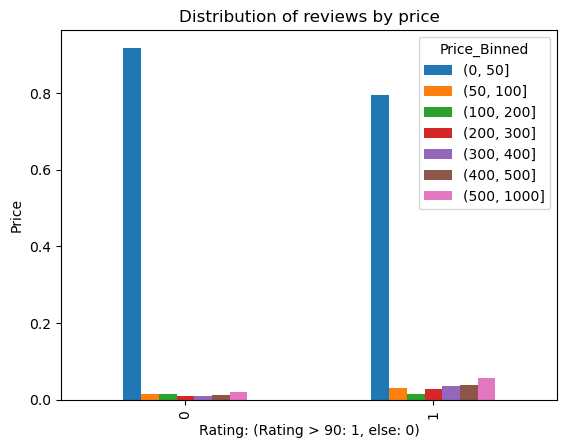

In [26]:
ct2.plot(kind='bar')
plt.title('Distribution of reviews by price')
plt.xlabel('Rating: (Rating > 90: 1, else: 0)')
plt.ylabel('Price')

In [31]:
#Correlation between price and rating
from scipy.stats import chi2_contingency
chi2_contingency (ct2)

(0.06747538835309569,
 0.9999937595607999,
 6,
 array([[0.85662687, 0.02270863, 0.01433045, 0.01939476, 0.02332307,
         0.02507223, 0.03854399],
        [0.85662687, 0.02270863, 0.01433045, 0.01939476, 0.02332307,
         0.02507223, 0.03854399]]))

In [28]:
dfeda2[['Rating', 'Aftertaste']].head(1000).value_counts()

Rating  Aftertaste
93      8.0           258
94      8.0           218
95      9.0           140
92      8.0           136
94      9.0            46
93      9.0            42
96      9.0            30
92      9.0            22
91      8.0            17
        7.0            15
90      7.0            14
        8.0            12
92      7.0            10
91      9.0             8
95      8.0             7
88      7.0             5
97      9.0             4
87      7.0             3
96      10.0            3
86      7.0             2
95      10.0            2
94      7.0             1
93      7.0             1
89      7.0             1
96      8.0             1
87      6.0             1
84      7.0             1
dtype: int64

In [29]:
ct3 = pd.crosstab(dfeda2['Rating'] , dfeda2['Aftertaste'], normalize='index')
ct3.head()

Aftertaste,2.00000,3.00000,4.00000,5.00000,6.00000,7.00000,8.00000,8.07073,9.00000,10.00000
Rating,,,,,,,,,,
52,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
66,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Aftertaste')

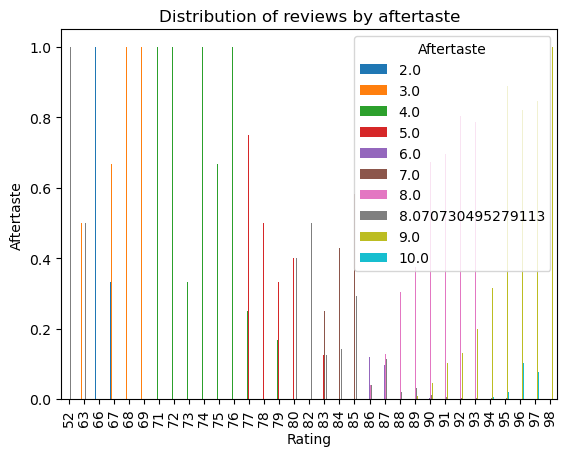

In [30]:
ct3.plot(kind='bar')
plt.title('Distribution of reviews by aftertaste')
plt.xlabel('Rating')
plt.ylabel('Aftertaste')

In [32]:
#Correlation between aftertaste and rating
chi2_contingency (ct3)

(168.38614010768566,
 0.9999999979910835,
 288,
 array([[0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13204576, 0.00633368],
        [0.04040404, 0.0959596 , 0.16414141, 0.09419192, 0.09009001,
         0.13713397, 0.14312767, 0.09657194, 0.13

<AxesSubplot:xlabel='Rating'>

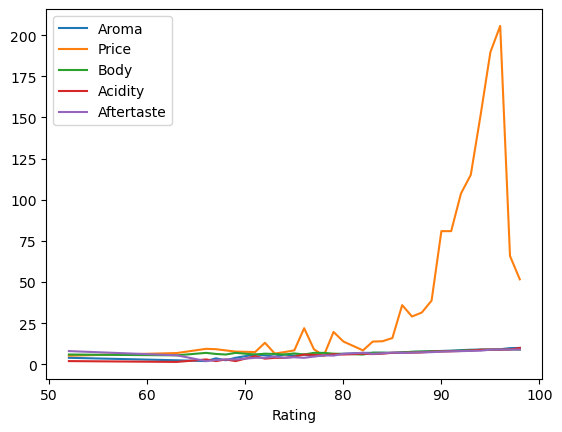

In [33]:
coffee1 = dfeda2.groupby(['Rating']).mean()[['Aroma', 'Price', 'Body', 'Acidity','Aftertaste']]
coffee1.plot()

<AxesSubplot:xlabel='Price', ylabel='Aroma'>

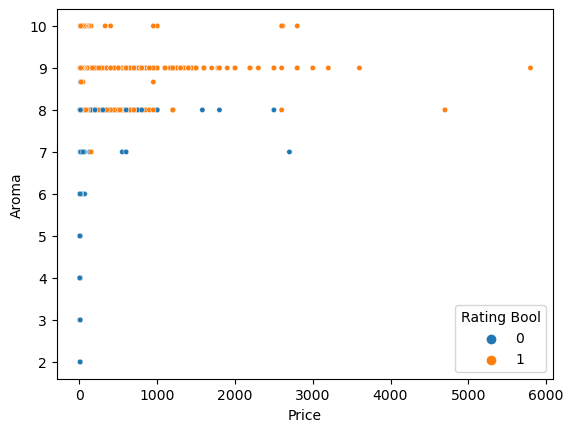

In [35]:
sns.scatterplot(x='Price', y='Aroma',  s=15, hue='Rating Bool', data=dfeda2)

<AxesSubplot:xlabel='Price', ylabel='Flavor'>

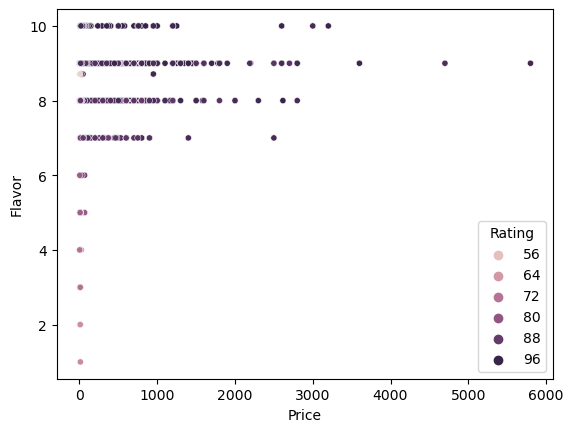

In [37]:
sns.scatterplot(x='Price', y='Flavor',  s=20, hue='Rating', data=dfeda2)

In [38]:
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [39]:
dfeda2.describe()

,Price,Rating,Aroma,Acidity,Body,Flavor,Aftertaste,Rating Bool
count,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000
mean,115.308964,92.294416,8.664566,8.319780,8.479162,8.711468,8.128725,0.841421
std,293.011089,2.682536,0.651271,0.721041,0.594384,0.724635,0.695466,0.365320
min,1.000000,52.000000,2.000000,1.000000,5.000000,1.000000,2.000000,0.000000
25%,15.000000,91.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000
50%,18.000000,93.000000,9.000000,8.000000,9.000000,9.000000,8.000000,1.000000
75%,30.950000,94.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000
max,5800.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


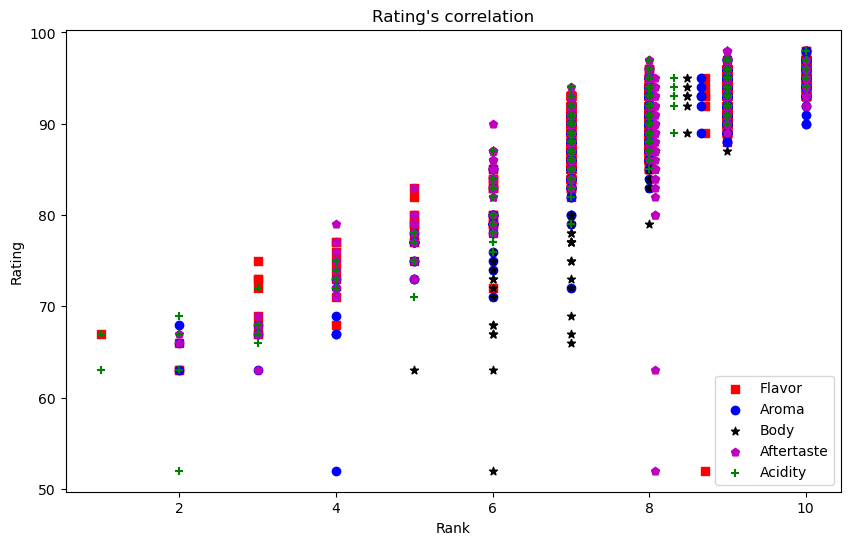

In [41]:
plt.scatter(x=dfeda2['Flavor'],y=dfeda2['Rating'],c='r',marker='s',label='Flavor')
plt.scatter(x=dfeda2['Aroma'],y=dfeda2['Rating'],c='b',marker='o',label='Aroma')
plt.scatter(x=dfeda2['Body'],y=dfeda2['Rating'],c='k',marker='*',label='Body')
plt.scatter(x=dfeda2['Aftertaste'],y=dfeda2['Rating'],c='m',marker='p',label='Aftertaste')
plt.scatter(x=dfeda2['Acidity'],y=dfeda2['Rating'],c='g',marker='+',label='Acidity')

plt.legend(numpoints=1,loc=4)
plt.title("Rating's correlation")
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.show()

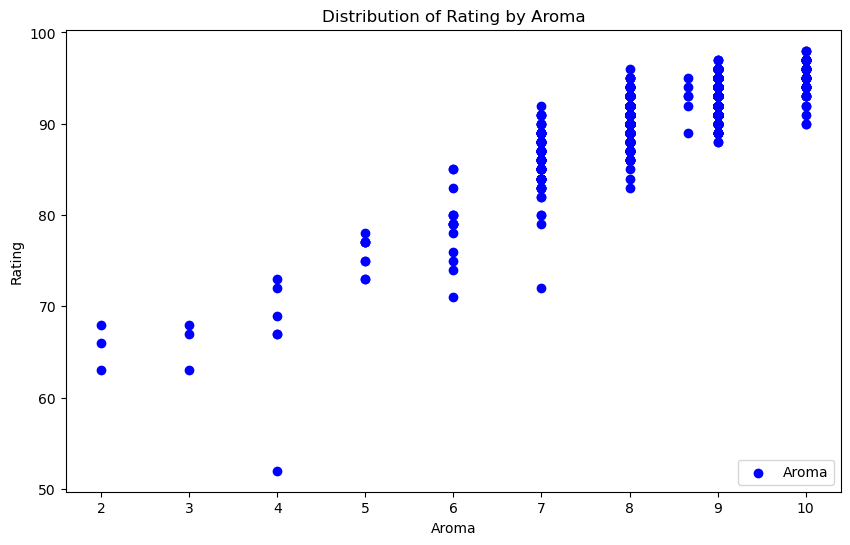

In [42]:
plt.scatter(x=dfeda2['Aroma'],y=dfeda2['Rating'],c='b',marker='o',label='Aroma')

plt.legend(numpoints=1,loc=4)
plt.title('Distribution of Rating by Aroma')
plt.xlabel('Aroma')
plt.ylabel('Rating')
plt.show()

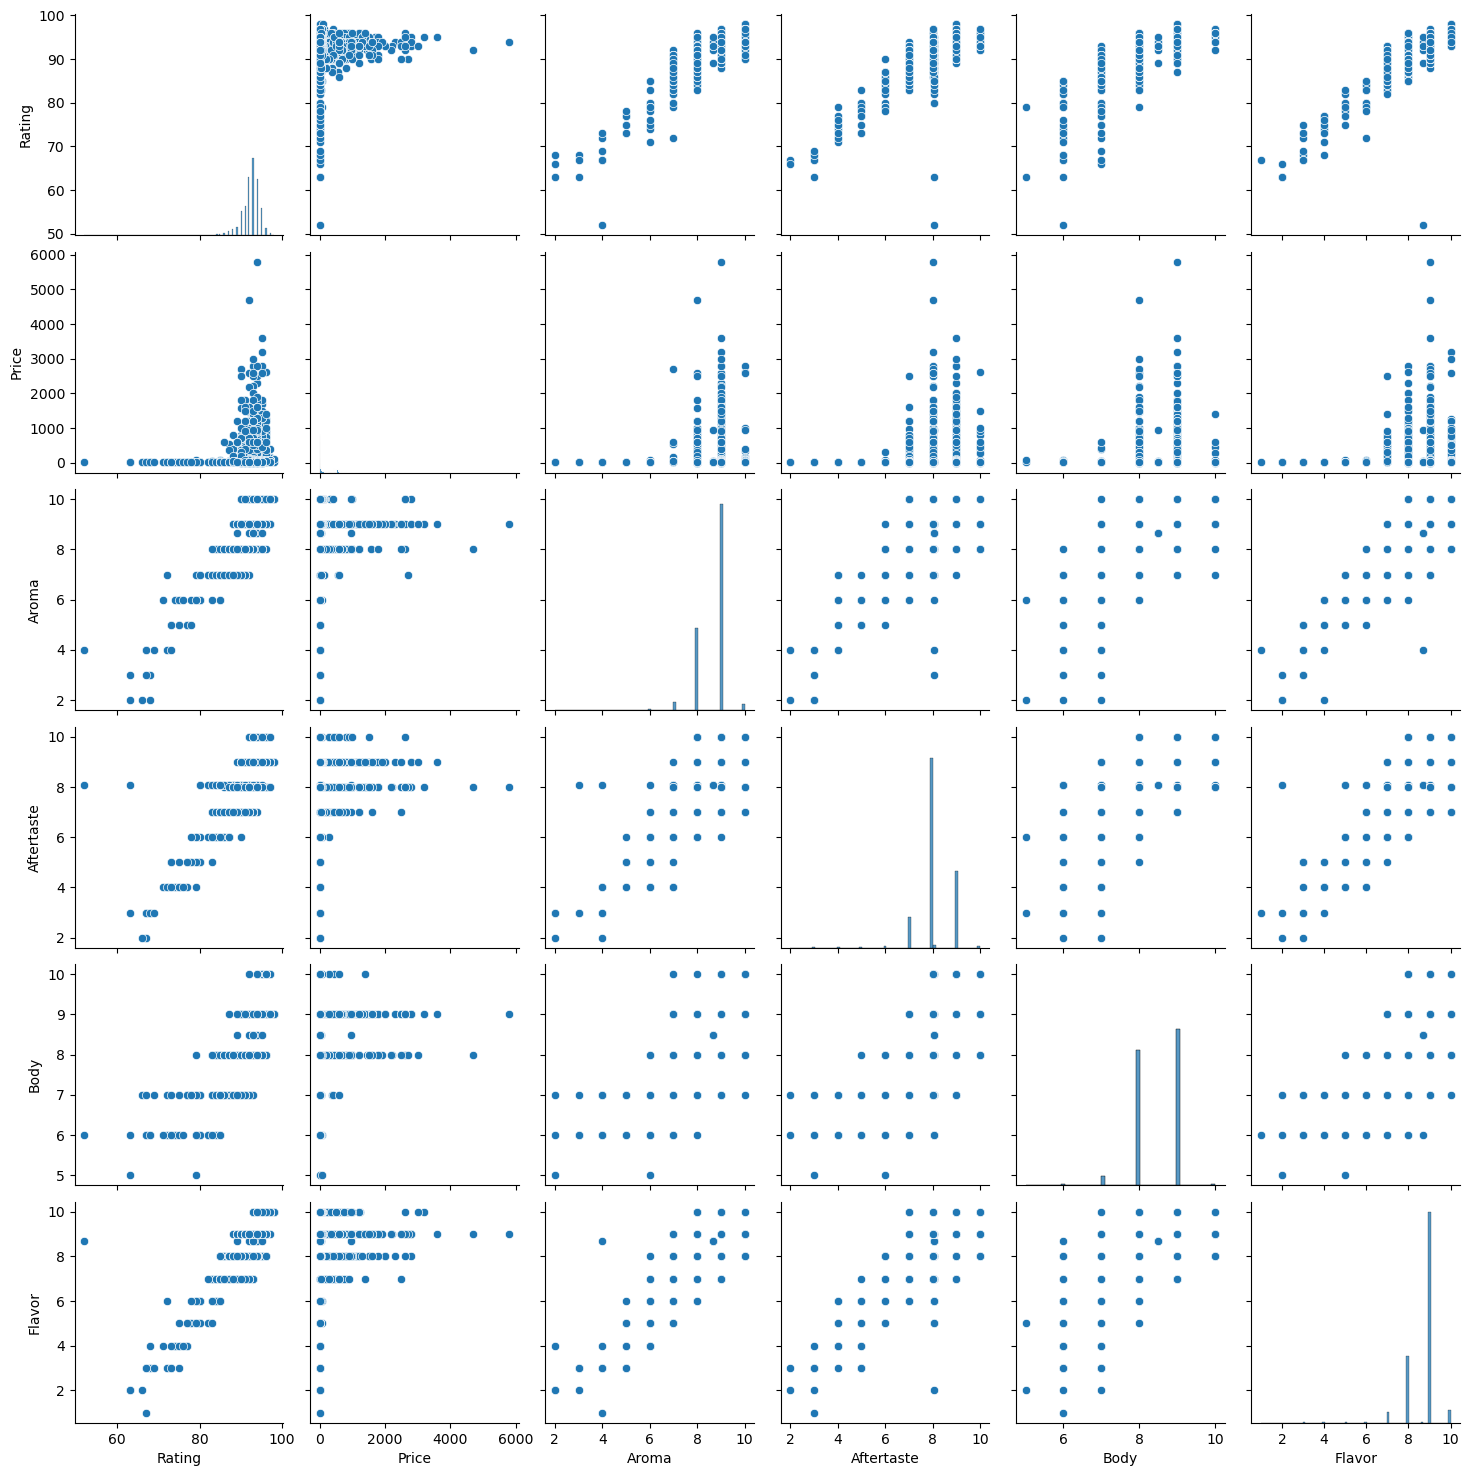

In [46]:
sns.pairplot(dfeda2[['Rating', 'Price', 'Aroma', 'Aftertaste', 'Body', 'Flavor']])